In [2]:
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [6]:
data_dict = {'station' : ['A','B','C','D','E']*2, 'dist': [2,15,20,1000,1500]*2, 'temp': [30.0,32,38,68.0,79.0]*2, 'day': [1]*5 + [2]*5}
data = pd.DataFrame(data_dict)
data

,station,dist,temp,day
0,A,2,30.0,1
1,B,15,32.0,1
2,C,20,38.0,1
3,D,1000,68.0,1
4,E,1500,79.0,1
5,A,2,30.0,2
6,B,15,32.0,2
7,C,20,38.0,2
8,D,1000,68.0,2
9,E,1500,79.0,2


In [8]:
data_1 = data[data.day==1]
data_1

,station,dist,temp,day
0,A,2,30.0,1
1,B,15,32.0,1
2,C,20,38.0,1
3,D,1000,68.0,1
4,E,1500,79.0,1


In [17]:
# create new column
data['dist_km'] = data.dist * 1.6
data

def mi2km(d):
    return d * 1.61

def total_distance(d1,d2):
    return d1 + d2

data['dist_km2'] = data.dist.apply(mi2km)
data

data['total'] = data.apply(lambda row:total_distance(row.dist_km,row.dist_km2), axis=1)
data

,station,dist,temp,day,dist_km,dist_km2,total
0,A,2,30.0,1,3.2,3.22,6.42
1,B,15,32.0,1,24.0,24.15,48.15
2,C,20,38.0,1,32.0,32.20,64.20
3,D,1000,68.0,1,1600.0,1610.00,3210.00
4,E,1500,79.0,1,2400.0,2415.00,4815.00
5,A,2,30.0,2,3.2,3.22,6.42
6,B,15,32.0,2,24.0,24.15,48.15
7,C,20,38.0,2,32.0,32.20,64.20
8,D,1000,68.0,2,1600.0,1610.00,3210.00
9,E,1500,79.0,2,2400.0,2415.00,4815.00


In [18]:
data = data.drop(columns=['dist_km','dist_km2','total'])
data

,station,dist,temp,day
0,A,2,30.0,1
1,B,15,32.0,1
2,C,20,38.0,1
3,D,1000,68.0,1
4,E,1500,79.0,1
5,A,2,30.0,2
6,B,15,32.0,2
7,C,20,38.0,2
8,D,1000,68.0,2
9,E,1500,79.0,2


In [20]:
p = 2
data['inv_dist'] = 1 / (data.dist**p)
data

,station,dist,temp,day,inv_dist
0,A,2,30.0,1,2.500000e-01
1,B,15,32.0,1,4.444444e-03
2,C,20,38.0,1,2.500000e-03
3,D,1000,68.0,1,1.000000e-06
4,E,1500,79.0,1,4.444444e-07
5,A,2,30.0,2,2.500000e-01
6,B,15,32.0,2,4.444444e-03
7,C,20,38.0,2,2.500000e-03
8,D,1000,68.0,2,1.000000e-06
9,E,1500,79.0,2,4.444444e-07


In [21]:
# inverse weighted temperature
data['weighted'] = data.temp * data.inv_dist
data

,station,dist,temp,day,inv_dist,weighted
0,A,2,30.0,1,2.500000e-01,7.500000
1,B,15,32.0,1,4.444444e-03,0.142222
2,C,20,38.0,1,2.500000e-03,0.095000
3,D,1000,68.0,1,1.000000e-06,0.000068
4,E,1500,79.0,1,4.444444e-07,0.000035
5,A,2,30.0,2,2.500000e-01,7.500000
6,B,15,32.0,2,4.444444e-03,0.142222
7,C,20,38.0,2,2.500000e-03,0.095000
8,D,1000,68.0,2,1.000000e-06,0.000068
9,E,1500,79.0,2,4.444444e-07,0.000035


In [24]:
day1 = data[data.day==1]
day1

,station,dist,temp,day,inv_dist,weighted
0,A,2,30.0,1,2.500000e-01,7.500000
1,B,15,32.0,1,4.444444e-03,0.142222
2,C,20,38.0,1,2.500000e-03,0.095000
3,D,1000,68.0,1,1.000000e-06,0.000068
4,E,1500,79.0,1,4.444444e-07,0.000035


In [26]:
day1.sum()

station        ABCDE
dist            2537
temp           247.0
day                5
inv_dist    0.256946
weighted    7.737325
dtype: object

In [27]:
7.737325 / 0.256946

30.112650128820842

In [31]:
grouped = data.groupby('day')
grouped

In [32]:
list(grouped)

[(1,
    station  dist  temp  day      inv_dist  weighted
  0       A     2  30.0    1  2.500000e-01  7.500000
  1       B    15  32.0    1  4.444444e-03  0.142222
  2       C    20  38.0    1  2.500000e-03  0.095000
  3       D  1000  68.0    1  1.000000e-06  0.000068
  4       E  1500  79.0    1  4.444444e-07  0.000035),
 (2,
    station  dist  temp  day      inv_dist  weighted
  5       A     2  30.0    2  2.500000e-01  7.500000
  6       B    15  32.0    2  4.444444e-03  0.142222
  7       C    20  38.0    2  2.500000e-03  0.095000
  8       D  1000  68.0    2  1.000000e-06  0.000068
  9       E  1500  79.0    2  4.444444e-07  0.000035)]

In [34]:
list(grouped)[0][1]

,station,dist,temp,day,inv_dist,weighted
0,A,2,30.0,1,2.500000e-01,7.500000
1,B,15,32.0,1,4.444444e-03,0.142222
2,C,20,38.0,1,2.500000e-03,0.095000
3,D,1000,68.0,1,1.000000e-06,0.000068
4,E,1500,79.0,1,4.444444e-07,0.000035


In [35]:
list(grouped.weighted)

[(1,
  0    7.500000
  1    0.142222
  2    0.095000
  3    0.000068
  4    0.000035
  Name: weighted, dtype: float64),
 (2,
  5    7.500000
  6    0.142222
  7    0.095000
  8    0.000068
  9    0.000035
  Name: weighted, dtype: float64)]

In [36]:
grouped.weighted.sum()

day
1    7.737325
2    7.737325
Name: weighted, dtype: float64

In [37]:
grouped.inv_dist.sum()

day
1    0.256946
2    0.256946
Name: inv_dist, dtype: float64

In [44]:
result = data.groupby('day').weighted.sum() / data.groupby('day').inv_dist.sum()

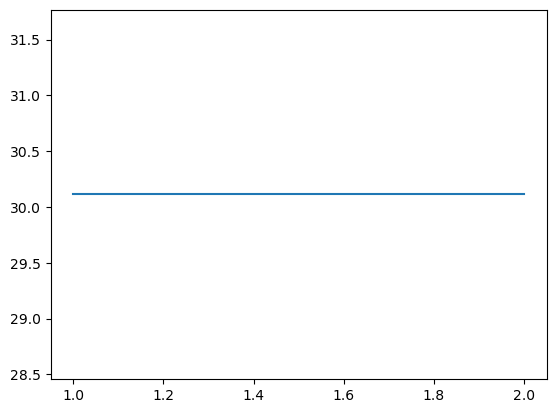

In [45]:
import matplotlib.pyplot as plt
plt.plot(result)